## Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn import tree

## Reading Data

In [2]:
x_train = np.genfromtxt('../Datasets/X_train.csv', delimiter = ',')[1:, 1:]
x_test  = np.genfromtxt('../Datasets/X_test.csv', delimiter = ',')[1:, 1:]

In [3]:
y_train = np.genfromtxt('../Datasets/y_train.csv', delimiter = ',')[1:, 1:]
y_train = y_train.reshape(y_train.shape[0])

y_test = np.genfromtxt('../Datasets/y_test.csv', delimiter = ',')[1:, 1:]
y_test = y_test.reshape(y_test.shape[0])

In [4]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train, y_train)
y_pred_test = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [5]:
print("-----------------------------------------------------------------------")
print(classification_report(y_test, y_pred_test))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76        29
         1.0       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

-----------------------------------------------------------------------


In [6]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred_test))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred_test)*100))
print("-----------------------------------------------------------------------")
print("overfitting")

-----------------------------------------------------------------------
Confusion matrix : 
 [[22  7]
 [ 7 25]]
-----------------------------------------------------------------------
Train Accuracy : 100.00%
Test Accuracy  : 77.05%
-----------------------------------------------------------------------
overfitting


## Parameter Tuning

In [7]:
def param_tuning(x_train,x_validate,y_train,y_validate):
    criterion = ["gini","entropy"]
    max_depth = np.arange(3,25)
    max_leaf_nodes = np.arange(3,65)
    max_acc = 0
    c_max = ""
    d_max = 0
    l_max = 0
    for c in criterion:
        for d in max_depth:
            for l in max_leaf_nodes:
                clf = DecisionTreeClassifier(
                    criterion = c,
                    max_depth = d,
                    max_leaf_nodes = l,
                    random_state=0
                )
                clf.fit(x_train,y_train)
                y_pred = clf.predict(x_test)
                if(accuracy_score(y_test,y_pred) > max_acc):
                    max_acc = accuracy_score(y_test,y_pred)
                    c_max = c
                    d_max = d
                    l_max = l
    print("max_acc",max_acc)
    return c_max,d_max,l_max

In [8]:
c_optimal,d_optimal,l_optimal = param_tuning(x_train,x_test,y_train,y_test)

max_acc 0.8032786885245902


In [9]:
print("Optimal Criterian :",c_optimal)
print("Optimal max_depth :",d_optimal)
print("Optimal max_leaf_nodes",l_optimal)

Optimal Criterian : gini
Optimal max_depth : 4
Optimal max_leaf_nodes 8


In [10]:
clf2 = DecisionTreeClassifier(criterion=c_optimal,max_depth=d_optimal,max_leaf_nodes=l_optimal,random_state=0)
clf2.fit(x_train,y_train)
y_pred_test = clf2.predict(x_test)
y_pred_train = clf2.predict(x_train) 

In [11]:
print("Classification Report : ", classification_report(y_test, y_pred_test))

Classification Report :                precision    recall  f1-score   support

         0.0       0.74      0.90      0.81        29
         1.0       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [12]:
print("-----------------------------------------------------------------------")
print("Confusion matrix : \n", confusion_matrix(y_test, y_pred_test))
print("-----------------------------------------------------------------------")
print('\033[1m'+"Train Accuracy : {:.2f}%".format(accuracy_score(y_train,clf2.predict(x_train))*100))
print("Test Accuracy  : {:.2f}%".format(accuracy_score(y_test,y_pred_test)*100))
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
Confusion matrix : 
 [[26  3]
 [ 9 23]]
-----------------------------------------------------------------------
Train Accuracy : 82.64%
Test Accuracy  : 80.33%
-----------------------------------------------------------------------


In [13]:
# Visualizing the tree
text_representation = tree.export_text(clf2)
print(text_representation)

|--- feature_20 <= 0.50
|   |--- feature_6 <= -0.42
|   |   |--- feature_15 <= 0.50
|   |   |   |--- feature_3 <= -0.18
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_3 >  -0.18
|   |   |   |   |--- class: 0.0
|   |   |--- feature_15 >  0.50
|   |   |   |--- class: 0.0
|   |--- feature_6 >  -0.42
|   |   |--- feature_5 <= -0.23
|   |   |   |--- class: 0.0
|   |   |--- feature_5 >  -0.23
|   |   |   |--- class: 0.0
|--- feature_20 >  0.50
|   |--- feature_6 <= 0.99
|   |   |--- feature_12 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_12 >  0.50
|   |   |   |--- class: 1.0
|   |--- feature_6 >  0.99
|   |   |--- class: 0.0



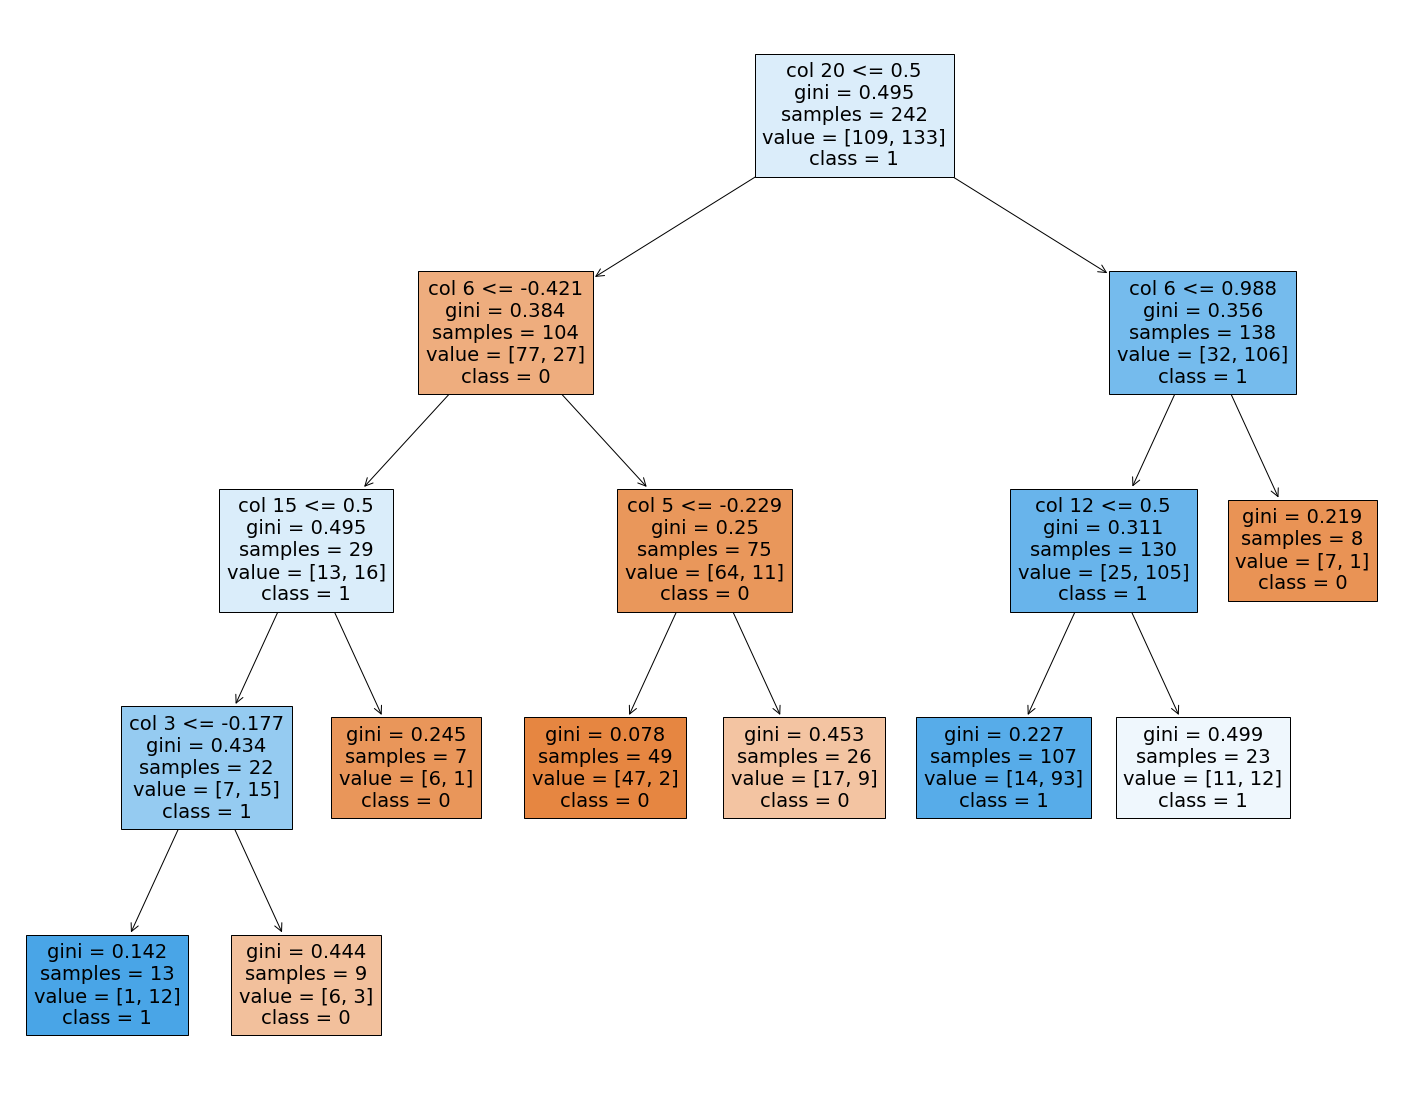

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf2, 
                   feature_names=[('col ' + str(i)) for i in range(22)],  
                   class_names=[str(i) for i in range(0, 2)],
                   filled=True)

In [15]:
fig.savefig("../TreesPdfs/Tuned_DecisionTree2.png")